In [49]:
import sys
import os
sys.path.append(os.path.dirname(os.path.abspath(os.path.dirname('__file__'))))
import jReversion as jR
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, balanced_accuracy_score
import networkx as nx
from statannot import add_stat_annotation
import scipy as sp

In [50]:
# model = 'mapk'
# result_pd = pd.read_csv('../data/' + model + '_canalizing.csv')
# result_pd = pd.read_csv('../data/' + model + '_2_canalizing.csv')
random_r3 = pd.read_csv('../data/cc_config_211126.csv')
random_canalizing = pd.read_csv('../data/cc_canalizing_chain_211126.csv')

In [51]:
random_r3 = random_r3.drop(columns=['Unnamed: 0'])
random_canalizing = random_canalizing.drop(columns=['Unnamed: 0'])

In [52]:
random_pd = pd.merge(left=random_r3, right=random_canalizing, on=['model', 'network_idx'])

In [53]:
ori_r3 = pd.read_csv('../data/original.csv').drop(columns=['Unnamed: 0'])

In [54]:
ori_r3['model'] = ori_r3['network_idx']
ori_r3['network_idx'] = -1

In [55]:
ori_canalizing = pd.read_csv('../data/cc_canalizing_chain_ori.csv').drop(columns=['Unnamed: 0'])
ori_canalizing.head()

,model,num_wccs,norm_num_wccs,len_largest_wcc,norm_len_largest_wcc,avg_len_wcc
0,bortezomib,23,0.171642,67,1.000000,5.826087
1,apoptosis,13,0.158537,51,1.243902,6.307692
2,bt474_short,15,0.468750,18,1.125000,2.133333
3,colitis,19,0.135714,115,1.642857,7.368421
4,death,13,0.232143,27,0.964286,4.307692


In [56]:
ori_pd = pd.merge(left=ori_r3, right=ori_canalizing, on='model', how='right')
ori_pd.head()

,network_idx,size_of_network,num_link,C0,C1,C2,C3,robustness_pa,robustness_ip,redundancy,deterministic_io_ratio,empty_io_ratio,num_input,num_output,model,num_wccs,norm_num_wccs,len_largest_wcc,norm_len_largest_wcc,avg_len_wcc
0,-1,67,135,26,23,1,17,0.656716,0.925111,330.371429,0.583333,0.2500,5.0,3.0,bortezomib,23,0.171642,67,1.000000,5.826087
1,-1,41,75,37,2,0,2,0.503049,0.834270,-1.000000,0.000000,1.0000,2.0,1.0,apoptosis,13,0.158537,51,1.243902,6.307692
2,-1,16,51,1,10,0,5,0.687500,0.637451,8.709091,0.687500,0.1875,5.0,2.0,bt474_short,15,0.468750,18,1.125000,2.133333
3,-1,70,154,55,14,0,1,0.338095,0.855845,-1.000000,0.000000,1.0000,1.0,2.0,colitis,19,0.135714,115,1.642857,7.368421
4,-1,28,48,3,12,1,12,0.375000,0.767753,16.000000,0.125000,0.6250,3.0,3.0,death,13,0.232143,27,0.964286,4.307692


In [57]:
random_pd['type'] = 'random'
ori_pd['type'] = 'original'
result_pd = pd.concat([random_pd, ori_pd], ignore_index=True)

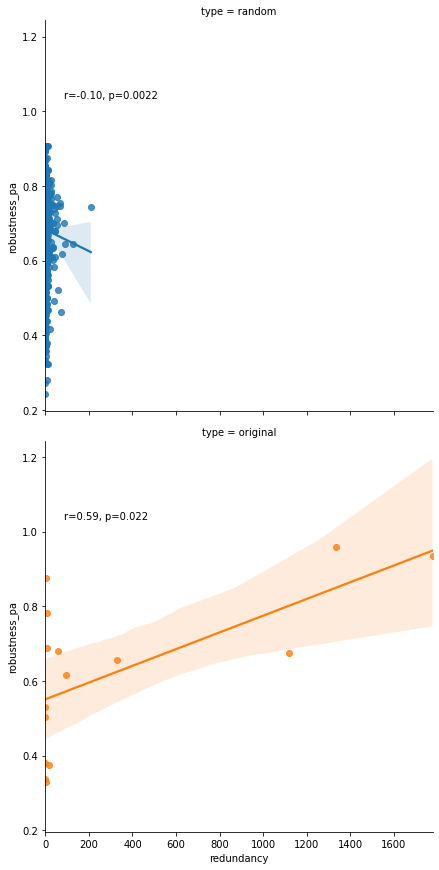

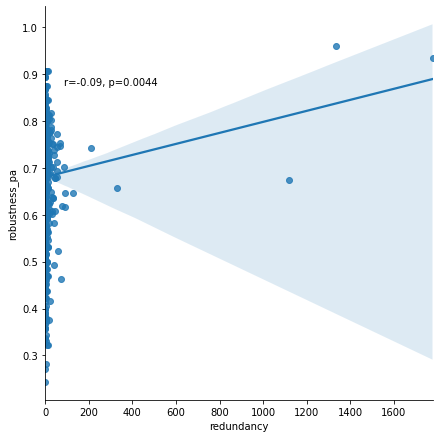

In [58]:
x_val = 'redundancy'
y_val = 'robustness_pa'
# g = sns.lmplot(x=x_val, y=y_val, data=result_pd, 
#                col='type',
#                height=6, aspect=1, logx=False, markers='o')
# [result_pd['redundancy'] > 0]
def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data[x_val], data[y_val])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
# g.map_dataframe(annotate)
# g.set_axis_labels(x_val, y_val)
# plt.show()
g = sns.lmplot(x=x_val, y=y_val, data=result_pd, 
               row='type', hue='type',
               height=6, aspect=1, logx=False, markers='o')

g.map_dataframe(annotate)
g.set_axis_labels(x_val, y_val)
plt.show()

g = sns.lmplot(x=x_val, y=y_val, data=result_pd, 
               height=6, aspect=1, logx=False, markers='o')

g.map_dataframe(annotate)
g.set_axis_labels(x_val, y_val)
plt.show()

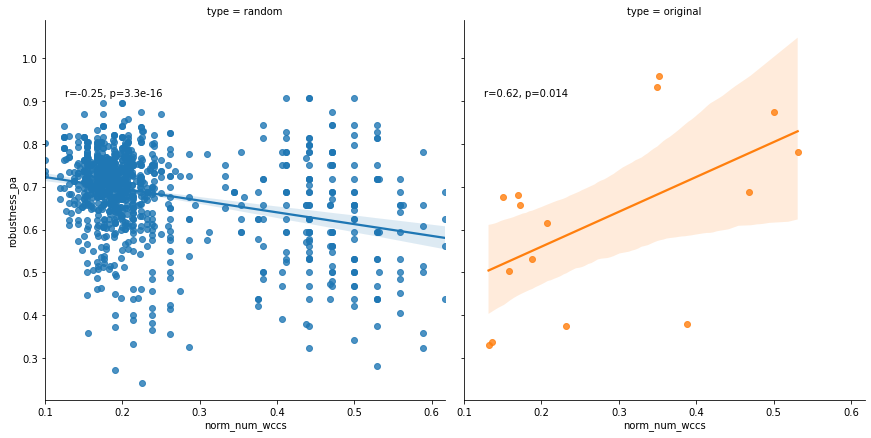

In [59]:
x_val = 'norm_num_wccs'
y_val = 'robustness_pa'

def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data[x_val], data[y_val])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    

g = sns.lmplot(x=x_val, y=y_val, data=result_pd, 
               col='type', hue='type',
               height=6, aspect=1, logx=False, markers='o')

g.map_dataframe(annotate)
g.set_axis_labels(x_val, y_val)
plt.show()

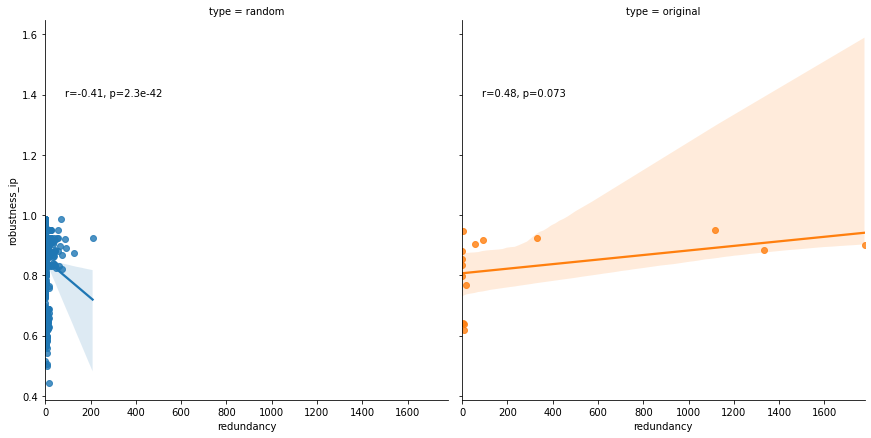

In [60]:
x_val = 'redundancy'
y_val = 'robustness_ip'
# g = sns.lmplot(x=x_val, y=y_val, data=result_pd, 
#                col='type',
#                height=6, aspect=1, logx=False, markers='o')

def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data[x_val], data[y_val])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
# g.map_dataframe(annotate)
# g.set_axis_labels(x_val, y_val)
# plt.show()
g = sns.lmplot(x=x_val, y=y_val, data=result_pd, 
               col='type', hue='type',
               height=6, aspect=1, logx=False, markers='o')

g.map_dataframe(annotate)
g.set_axis_labels(x_val, y_val)
plt.show()

In [61]:
melt_pd = pd.melt(result_pd, id_vars=['model', 'network_idx', 'size_of_network', 'type','num_link', 'robustness_pa', 'robustness_ip', 'redundancy', 'deterministic_io_ratio', 'empty_io_ratio', 'num_input', 'num_output', 'num_wccs', 'norm_num_wccs', 'len_largest_wcc', 'norm_len_largest_wcc', 'avg_len_wcc'], var_name='class')
melt_pd['value'] = melt_pd['value'] / melt_pd['size_of_network']

In [62]:
melt_pd.head()

,model,network_idx,size_of_network,type,num_link,robustness_pa,robustness_ip,redundancy,deterministic_io_ratio,empty_io_ratio,num_input,num_output,num_wccs,norm_num_wccs,len_largest_wcc,norm_len_largest_wcc,avg_len_wcc,class,value
0,bortezomib,61,67,random,126,0.656716,0.892141,-1.0,0.000000,1.0,5.0,3.0,30,0.220588,97,1.447761,NaN,C0,0.835821
1,bortezomib,27,67,random,128,0.731343,0.925373,-1.0,0.000000,1.0,5.0,3.0,26,0.191176,102,1.522388,NaN,C0,0.970149
2,bortezomib,60,67,random,128,0.636816,0.876720,32.0,0.166667,0.5,5.0,3.0,28,0.205882,87,1.298507,NaN,C0,0.820896
3,bortezomib,26,67,random,127,0.738806,0.925373,-1.0,0.000000,1.0,5.0,3.0,28,0.205882,88,1.313433,NaN,C0,0.746269
4,bortezomib,25,67,random,128,0.675373,0.887608,-1.0,0.000000,1.0,5.0,3.0,22,0.161765,104,1.552239,NaN,C0,0.791045


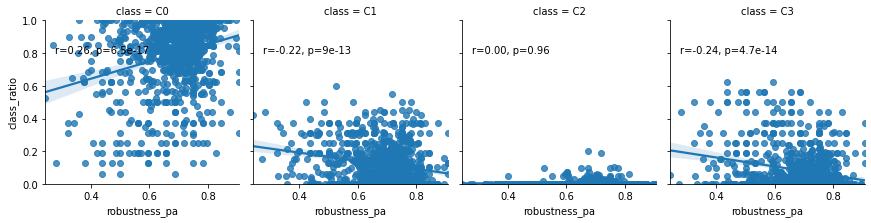

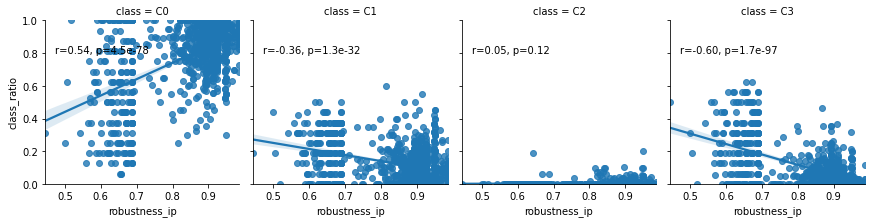

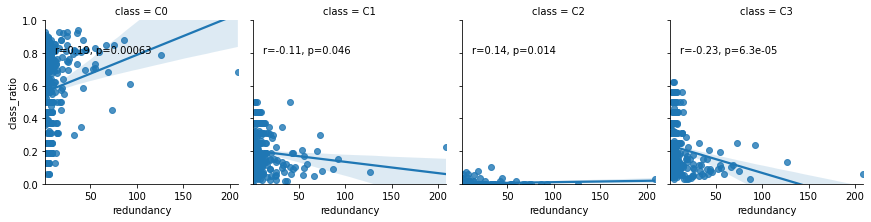

In [70]:
def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)

random_melt_pd = melt_pd[melt_pd['type']=='random']

x_val = 'robustness_pa'
g = sns.lmplot(x=x_val, y='value', data=random_melt_pd, col='class', 
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")
plt.savefig('rb_pa2.pdf', dpi=300)
x_val = 'robustness_ip'
g = sns.lmplot(x=x_val, y='value', data=random_melt_pd, col='class', 
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")
plt.savefig('rb_ip2.pdf', dpi=300)
x_val = 'redundancy'
g = sns.lmplot(x=x_val, y='value', data=random_melt_pd[random_melt_pd['redundancy'] > 0], col='class', 
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")
plt.savefig('rd2.pdf', dpi=300)

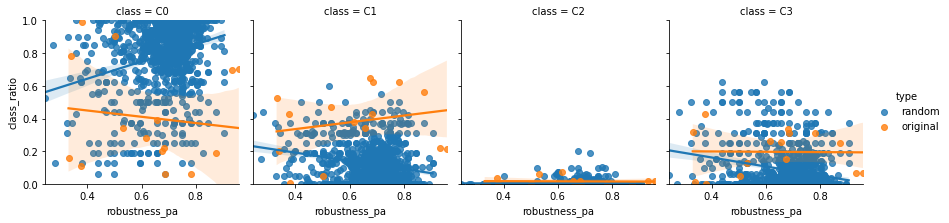

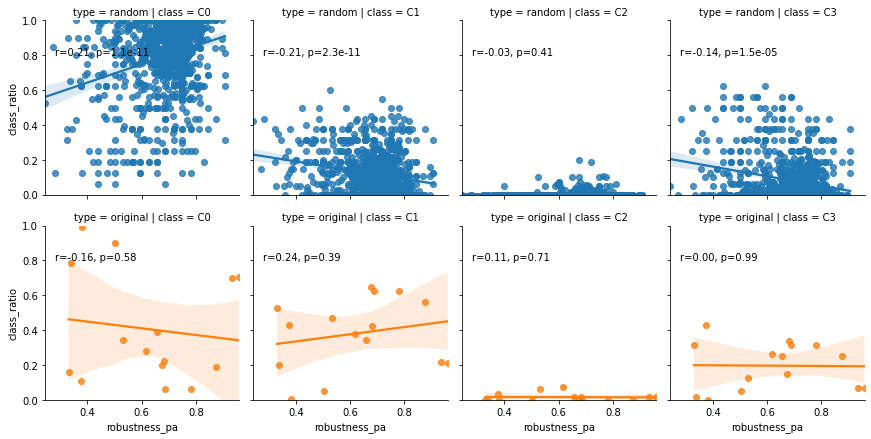

In [71]:
x_val = 'robustness_pa'
# [melt_pd['redundancy'] > 0]
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', hue='type',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.set_axis_labels(x_val, "class_ratio")

g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', row='type', hue='type',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

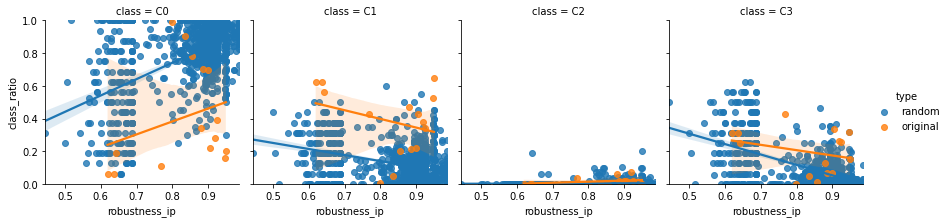

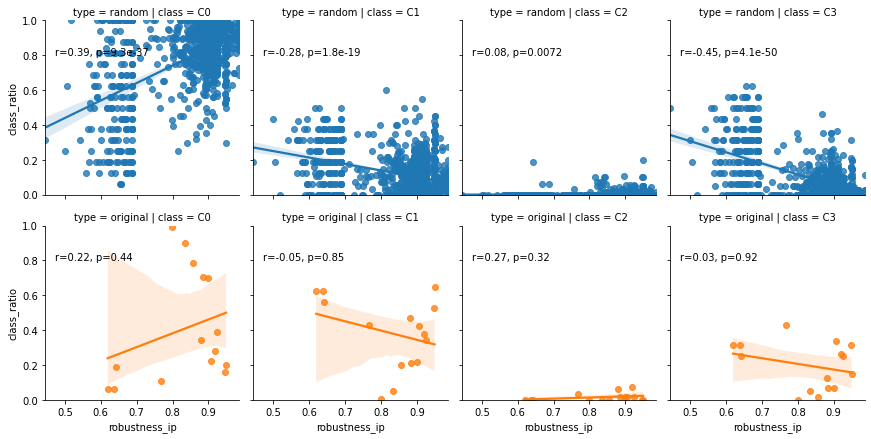

In [72]:
x_val = 'robustness_ip'
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', hue='type',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.set_axis_labels(x_val, "class_ratio")
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', row='type', hue='type',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

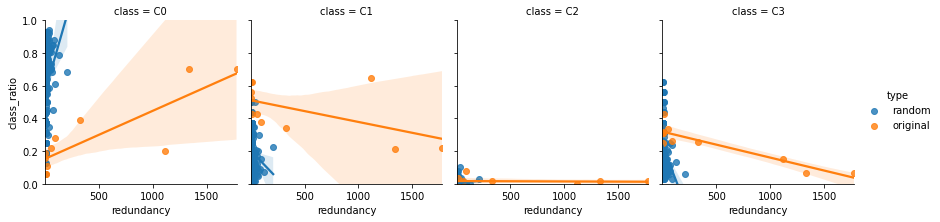

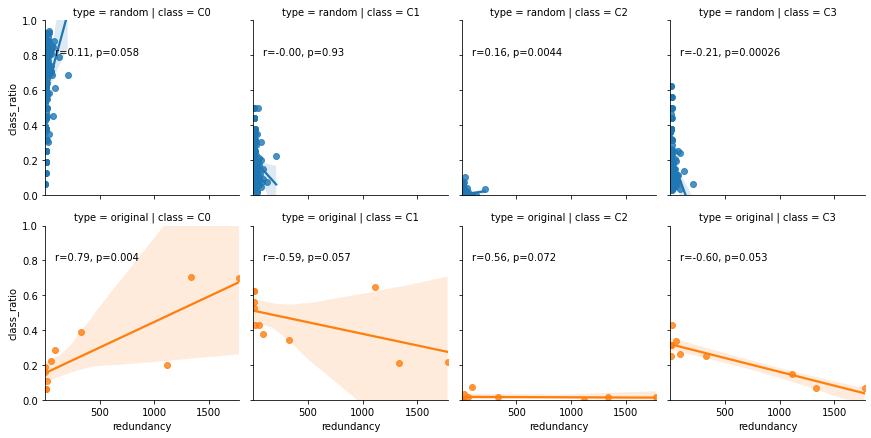

In [73]:
x_val = 'redundancy'
g = sns.lmplot(x=x_val, y='value', data=melt_pd[melt_pd['redundancy'] > 0], col='class', hue='type',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.set_axis_labels(x_val, "class_ratio")
g = sns.lmplot(x=x_val, y='value', data=melt_pd[melt_pd['redundancy'] > 0], col='class', row='type', hue='type',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

In [74]:
temp_pd = result_pd[result_pd['type'] == 'random'].copy()
temp_pd['reversibility'] = 1 - (temp_pd['C3'] / temp_pd['size_of_network'])
temp_pd.head()

,model,network_idx,size_of_network,num_link,C0,C1,C2,C3,robustness_pa,robustness_ip,...,redundancy,num_input,num_output,num_wccs,norm_num_wccs,len_largest_wcc,norm_len_largest_wcc,type,avg_len_wcc,reversibility
0,bortezomib,61,67,126,56,8,0,3,0.656716,0.892141,...,-1.0,5.0,3.0,30,0.220588,97,1.447761,random,NaN,0.955224
1,bortezomib,27,67,128,65,0,0,2,0.731343,0.925373,...,-1.0,5.0,3.0,26,0.191176,102,1.522388,random,NaN,0.970149
2,bortezomib,60,67,128,55,9,0,3,0.636816,0.876720,...,32.0,5.0,3.0,28,0.205882,87,1.298507,random,NaN,0.955224
3,bortezomib,26,67,127,50,14,1,2,0.738806,0.925373,...,-1.0,5.0,3.0,28,0.205882,88,1.313433,random,NaN,0.970149
4,bortezomib,25,67,128,53,10,0,4,0.675373,0.887608,...,-1.0,5.0,3.0,22,0.161765,104,1.552239,random,NaN,0.940299


In [92]:
temp_pd[temp_pd['redundancy'] > 0]

,model,network_idx,size_of_network,num_link,C0,C1,C2,C3,robustness_pa,robustness_ip,...,redundancy,num_input,num_output,num_wccs,norm_num_wccs,len_largest_wcc,norm_len_largest_wcc,type,avg_len_wcc,reversibility
2,bortezomib,60,67,128,55,9,0,3,0.636816,0.876720,...,32.0,5.0,3.0,28,0.205882,87,1.298507,random,NaN,0.955224
5,bortezomib,59,67,125,50,9,0,8,0.649254,0.878323,...,25.4,5.0,3.0,28,0.205882,89,1.328358,random,NaN,0.880597
8,bortezomib,23,67,127,55,7,0,5,0.679104,0.824029,...,45.6,5.0,3.0,31,0.227941,97,1.447761,random,NaN,0.925373
13,bortezomib,20,67,127,52,6,0,9,0.731343,0.925373,...,19.2,5.0,3.0,26,0.191176,97,1.447761,random,NaN,0.865672
23,bortezomib,50,67,128,62,3,0,2,0.776119,0.925373,...,20.0,5.0,3.0,27,0.198529,97,1.447761,random,NaN,0.970149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,oxidative,95,19,30,11,5,0,3,0.750000,0.947368,...,2.0,1.0,1.0,7,0.175000,34,1.789474,random,NaN,0.842105
932,oxidative,44,19,28,12,2,0,5,0.736842,0.898386,...,5.0,1.0,1.0,6,0.150000,11,0.578947,random,NaN,0.736842
958,oxidative,32,19,29,12,4,0,3,0.736842,0.894737,...,1.0,1.0,1.0,8,0.200000,28,1.473684,random,NaN,0.842105
962,oxidative,3,19,30,10,6,0,3,0.684211,0.947368,...,2.0,1.0,1.0,7,0.175000,32,1.684211,random,NaN,0.842105


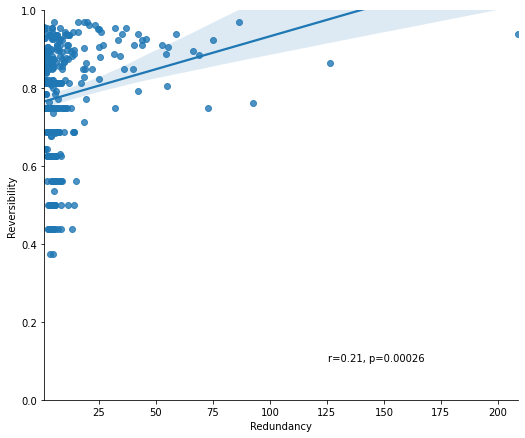

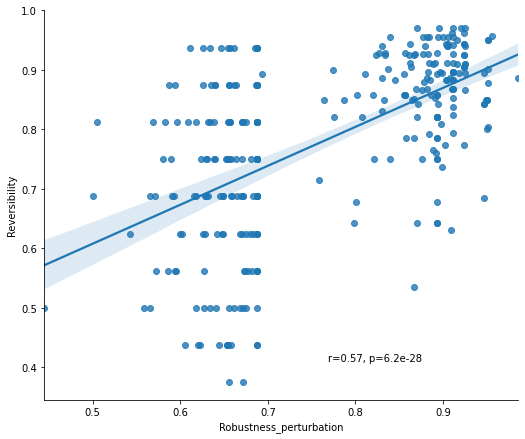

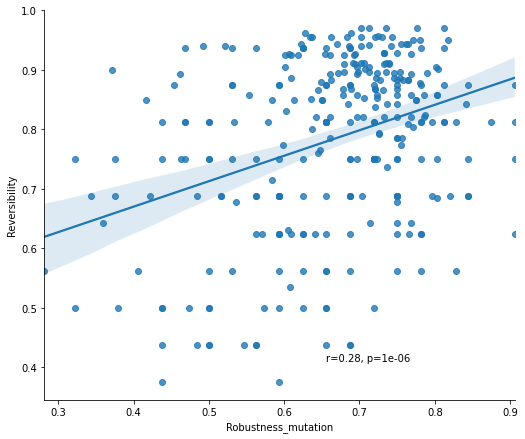

In [80]:
# sns.set(font_scale=2)
x_val = 'redundancy'
g = sns.lmplot(x=x_val, y='reversibility', data=temp_pd[temp_pd['redundancy'] > 0], height=6, aspect=1.2,
               )

def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data[x_val], data['reversibility'])
    ax = plt.gca()
    ax.text(.6, .1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels("Redundancy", "Reversibility")

x_val = 'robustness_ip'
g = sns.lmplot(x=x_val, y='reversibility', data=temp_pd[temp_pd['redundancy'] > 0], height=6, aspect=1.2, 
               )
# g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels("Robustness_perturbation", "Reversibility")

x_val = 'robustness_pa'
g = sns.lmplot(x=x_val, y='reversibility', data=temp_pd[temp_pd['redundancy'] > 0], height=6, aspect=1.2, 
               )
# g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels("Robustness_mutation", "Reversibility")

plt.savefig('r3_spearman.pdf', dpi=300)

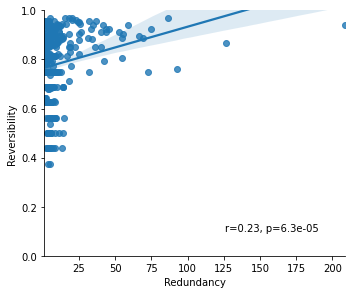

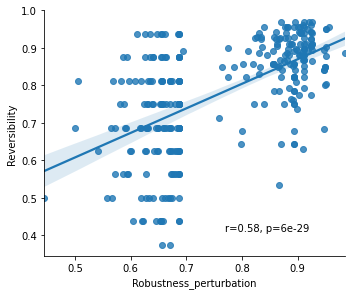

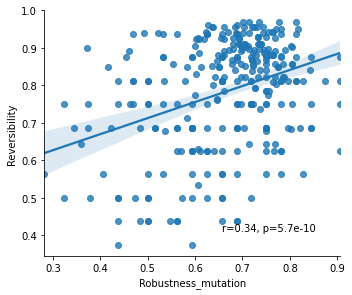

In [103]:
# sns.set(font_scale=2)
x_val = 'redundancy'
g = sns.lmplot(x=x_val, y='reversibility', data=temp_pd[temp_pd['redundancy'] > 0], height=4, aspect=1.2,
               )

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['reversibility'])
    ax = plt.gca()
    ax.text(.6, .1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels("Redundancy", "Reversibility")
plt.savefig('rd_pearson.pdf', dpi=300)
x_val = 'robustness_ip'
g = sns.lmplot(x=x_val, y='reversibility', data=temp_pd[temp_pd['redundancy'] > 0], height=4, aspect=1.2, 
               )
# g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels("Robustness_perturbation", "Reversibility")
plt.savefig('rp_pearson.pdf', dpi=300)

x_val = 'robustness_pa'
g = sns.lmplot(x=x_val, y='reversibility', data=temp_pd[temp_pd['redundancy'] > 0], height=4, aspect=1.2, 
               )
# g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels("Robustness_mutation", "Reversibility")

plt.savefig('rm_pearson.pdf', dpi=300)

In [36]:
# sns.reset_orig()

In [106]:
ori_r3['size_of_network'].unique()

array([ 67,  41,  25,  16,  70,  28,  68,  20,  53,  19, 139,  61,  60,
        32])

In [95]:
tt_pd = result_pd[result_pd['type']=='original'].copy()
tt_pd['reversibility'] = 1 - (tt_pd['C3'] / tt_pd['size_of_network'])

In [110]:
tt_pd['size_of_network'].unique()
tt_pd['num_link'].unique()

array([135,  75,  51, 154,  48, 109,  52, 108,  33, 555,  46, 200, 201,
       158])

In [123]:
ori_r3

,network_idx,size_of_network,num_link,C0,C1,C2,C3,robustness_pa,robustness_ip,redundancy,deterministic_io_ratio,empty_io_ratio,num_input,num_output,model
0,-1,67,135,26,23,1,17,0.656716,0.925111,330.371429,0.583333,0.25000,5.0,3.0,bortezomib
1,-1,41,75,37,2,0,2,0.503049,0.834270,-1.000000,0.000000,1.00000,2.0,1.0,apoptosis
2,-1,25,74,1,0,0,24,0.580000,0.622930,19.240000,0.208333,0.50000,6.0,3.0,bt474_long
3,-1,16,51,1,10,0,5,0.687500,0.637451,8.709091,0.687500,0.18750,5.0,2.0,bt474_short
4,-1,70,154,55,14,0,1,0.338095,0.855845,-1.000000,0.000000,1.00000,1.0,2.0,colitis
5,-1,28,48,3,12,1,12,0.375000,0.767753,16.000000,0.125000,0.62500,3.0,3.0,death
6,-1,25,74,0,0,0,25,0.480000,0.630156,24.250000,0.031250,0.87500,6.0,4.0,hcc1954_long
7,-1,16,51,3,9,0,4,0.875000,0.642456,4.600000,0.593750,0.40625,5.0,1.0,hcc1954_short
8,-1,68,109,15,29,1,23,0.681373,0.905948,56.066667,0.875000,0.12500,6.0,5.0,hgf
9,-1,20,52,4,13,0,3,0.675000,0.949463,1117.000000,0.500000,0.50000,1.0,1.0,mammalian


In [122]:
tt_pd['model']

1000       bortezomib
1001        apoptosis
1002      bt474_short
1003          colitis
1004            death
1005    hcc1954_short
1006              hgf
1007        mammalian
1008             mapk
1009        oxidative
1010      fibroblasts
1011      skbr3_short
1012        tlgl_2008
1013        tlgl_2011
1014        migration
Name: model, dtype: object

In [119]:
tt_pd[tt_pd['redundancy'] > 0]

,model,network_idx,size_of_network,num_link,C0,C1,C2,C3,robustness_pa,robustness_ip,...,redundancy,num_input,num_output,num_wccs,norm_num_wccs,len_largest_wcc,norm_len_largest_wcc,type,avg_len_wcc,reversibility
1000,bortezomib,-1,67,135,26,23,1,17,0.656716,0.925111,...,330.371429,5.0,3.0,23,0.171642,67,1.000000,original,5.826087,0.746269
1002,bt474_short,-1,16,51,1,10,0,5,0.687500,0.637451,...,8.709091,5.0,2.0,15,0.468750,18,1.125000,original,2.133333,0.687500
1004,death,-1,28,48,3,12,1,12,0.375000,0.767753,...,16.000000,3.0,3.0,13,0.232143,27,0.964286,original,4.307692,0.571429
1005,hcc1954_short,-1,16,51,3,9,0,4,0.875000,0.642456,...,4.600000,5.0,1.0,16,0.500000,17,1.062500,original,2.000000,0.750000
1006,hgf,-1,68,109,15,29,1,23,0.681373,0.905948,...,56.066667,6.0,5.0,23,0.169118,56,0.823529,original,5.913043,0.661765
1007,mammalian,-1,20,52,4,13,0,3,0.675000,0.949463,...,1117.000000,1.0,1.0,6,0.150000,28,1.400000,original,6.666667,0.850000
1008,mapk,-1,53,108,15,20,4,14,0.616352,0.918835,...,92.666667,4.0,3.0,22,0.207547,71,1.339623,original,4.818182,0.735849
1009,oxidative,-1,19,33,3,10,0,6,0.330409,0.947368,...,5.000000,1.0,1.0,5,0.131579,27,1.421053,original,7.600000,0.684211
1011,skbr3_short,-1,16,46,1,10,0,5,0.781250,0.619202,...,7.300000,5.0,2.0,17,0.531250,11,0.687500,original,1.882353,0.687500
1012,tlgl_2008,-1,61,200,43,13,1,4,0.959016,0.884590,...,1334.714286,7.0,2.0,43,0.352459,80,1.311475,original,2.837209,0.934426


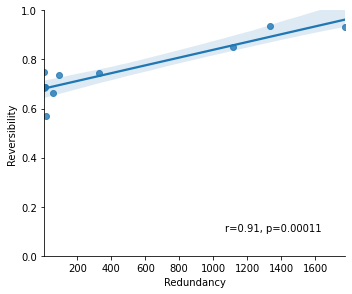

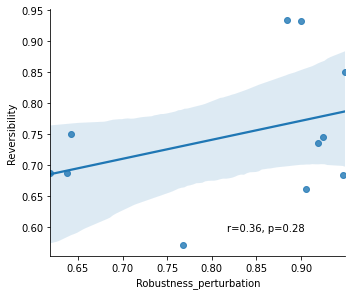

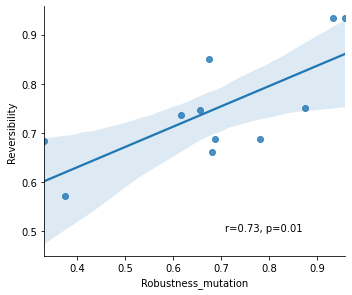

In [102]:
x_val = 'redundancy'
g = sns.lmplot(x=x_val, y='reversibility', data=tt_pd[tt_pd['redundancy'] > 0], height=4, aspect=1.2,
               )

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['reversibility'])
    ax = plt.gca()
    ax.text(.6, .1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels("Redundancy", "Reversibility")
plt.savefig('ori_rd_pearson.pdf', dpi=300)
x_val = 'robustness_ip'
g = sns.lmplot(x=x_val, y='reversibility', data=tt_pd[tt_pd['redundancy'] > 0], height=4, aspect=1.2, 
               )
# g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels("Robustness_perturbation", "Reversibility")
plt.savefig('ori_rp_pearson.pdf', dpi=300)

x_val = 'robustness_pa'
g = sns.lmplot(x=x_val, y='reversibility', data=tt_pd[tt_pd['redundancy'] > 0], height=4, aspect=1.2, 
               )
# g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels("Robustness_mutation", "Reversibility")

plt.savefig('ori_rm_pearson.pdf', dpi=300)

In [124]:
tto_pd = ori_r3.copy()
tto_pd['reversibility'] = 1 - (tto_pd['C3'] / tto_pd['size_of_network'])

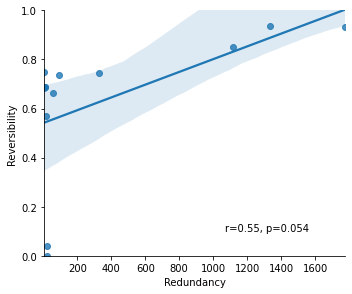

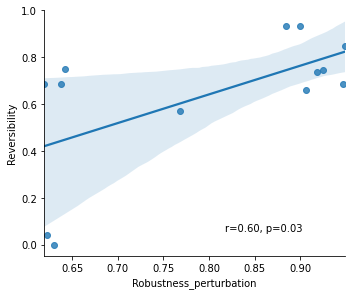

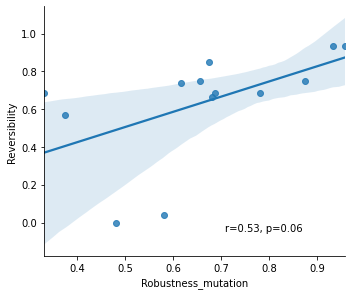

In [125]:
x_val = 'redundancy'
g = sns.lmplot(x=x_val, y='reversibility', data=tto_pd[tto_pd['redundancy'] > 0], height=4, aspect=1.2,
               )

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data[x_val], data['reversibility'])
    ax = plt.gca()
    ax.text(.6, .1, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels("Redundancy", "Reversibility")
plt.savefig('ori_rd_pearson.pdf', dpi=300)
x_val = 'robustness_ip'
g = sns.lmplot(x=x_val, y='reversibility', data=tto_pd[tto_pd['redundancy'] > 0], height=4, aspect=1.2, 
               )
# g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels("Robustness_perturbation", "Reversibility")
plt.savefig('ori_rp_pearson.pdf', dpi=300)

x_val = 'robustness_pa'
g = sns.lmplot(x=x_val, y='reversibility', data=tto_pd[tto_pd['redundancy'] > 0], height=4, aspect=1.2, 
               )
# g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels("Robustness_mutation", "Reversibility")

plt.savefig('ori_rm_pearson.pdf', dpi=300)

In [126]:
tto_pd[tto_pd['redundancy'] > 0]

,network_idx,size_of_network,num_link,C0,C1,C2,C3,robustness_pa,robustness_ip,redundancy,deterministic_io_ratio,empty_io_ratio,num_input,num_output,model,reversibility
0,-1,67,135,26,23,1,17,0.656716,0.925111,330.371429,0.583333,0.25000,5.0,3.0,bortezomib,0.746269
2,-1,25,74,1,0,0,24,0.580000,0.622930,19.240000,0.208333,0.50000,6.0,3.0,bt474_long,0.040000
3,-1,16,51,1,10,0,5,0.687500,0.637451,8.709091,0.687500,0.18750,5.0,2.0,bt474_short,0.687500
5,-1,28,48,3,12,1,12,0.375000,0.767753,16.000000,0.125000,0.62500,3.0,3.0,death,0.571429
6,-1,25,74,0,0,0,25,0.480000,0.630156,24.250000,0.031250,0.87500,6.0,4.0,hcc1954_long,0.000000
7,-1,16,51,3,9,0,4,0.875000,0.642456,4.600000,0.593750,0.40625,5.0,1.0,hcc1954_short,0.750000
8,-1,68,109,15,29,1,23,0.681373,0.905948,56.066667,0.875000,0.12500,6.0,5.0,hgf,0.661765
9,-1,20,52,4,13,0,3,0.675000,0.949463,1117.000000,0.500000,0.50000,1.0,1.0,mammalian,0.850000
10,-1,53,108,15,20,4,14,0.616352,0.918835,92.666667,0.500000,0.50000,4.0,3.0,mapk,0.735849
11,-1,19,33,3,10,0,6,0.330409,0.947368,5.000000,0.500000,0.50000,1.0,1.0,oxidative,0.684211


In [127]:
tt_pd[tt_pd['redundancy'] > 0]

,model,network_idx,size_of_network,num_link,C0,C1,C2,C3,robustness_pa,robustness_ip,...,redundancy,num_input,num_output,num_wccs,norm_num_wccs,len_largest_wcc,norm_len_largest_wcc,type,avg_len_wcc,reversibility
1000,bortezomib,-1,67,135,26,23,1,17,0.656716,0.925111,...,330.371429,5.0,3.0,23,0.171642,67,1.000000,original,5.826087,0.746269
1002,bt474_short,-1,16,51,1,10,0,5,0.687500,0.637451,...,8.709091,5.0,2.0,15,0.468750,18,1.125000,original,2.133333,0.687500
1004,death,-1,28,48,3,12,1,12,0.375000,0.767753,...,16.000000,3.0,3.0,13,0.232143,27,0.964286,original,4.307692,0.571429
1005,hcc1954_short,-1,16,51,3,9,0,4,0.875000,0.642456,...,4.600000,5.0,1.0,16,0.500000,17,1.062500,original,2.000000,0.750000
1006,hgf,-1,68,109,15,29,1,23,0.681373,0.905948,...,56.066667,6.0,5.0,23,0.169118,56,0.823529,original,5.913043,0.661765
1007,mammalian,-1,20,52,4,13,0,3,0.675000,0.949463,...,1117.000000,1.0,1.0,6,0.150000,28,1.400000,original,6.666667,0.850000
1008,mapk,-1,53,108,15,20,4,14,0.616352,0.918835,...,92.666667,4.0,3.0,22,0.207547,71,1.339623,original,4.818182,0.735849
1009,oxidative,-1,19,33,3,10,0,6,0.330409,0.947368,...,5.000000,1.0,1.0,5,0.131579,27,1.421053,original,7.600000,0.684211
1011,skbr3_short,-1,16,46,1,10,0,5,0.781250,0.619202,...,7.300000,5.0,2.0,17,0.531250,11,0.687500,original,1.882353,0.687500
1012,tlgl_2008,-1,61,200,43,13,1,4,0.959016,0.884590,...,1334.714286,7.0,2.0,43,0.352459,80,1.311475,original,2.837209,0.934426


In [134]:
temp_pd[temp_pd['redundancy'] > 0].to_csv('306_random_networks.csv')

In [112]:
temp_pd['size_of_network'].unique()

array([67, 41, 16, 70, 28, 68, 20, 53, 19])

In [113]:
temp_pd['num_link'].unique()

array([126, 128, 127, 125, 129, 124,  72,  71,  69,  70,  73,  31,  34,
        30,  33,  32,  28, 153, 151, 150, 152, 149, 148, 146,  43,  44,
        42,  41,  40,  35,  29, 102, 103, 101, 100,  48,  49,  47,  50,
        46,  45,  51, 104,  99,  27,  26])

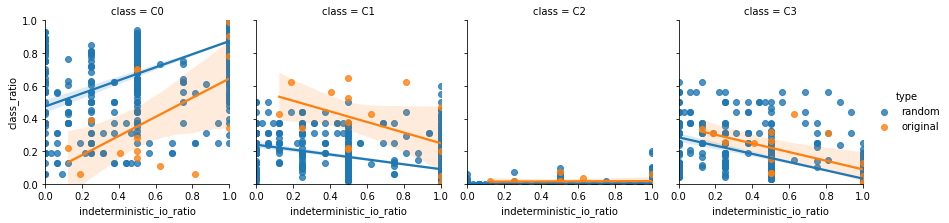

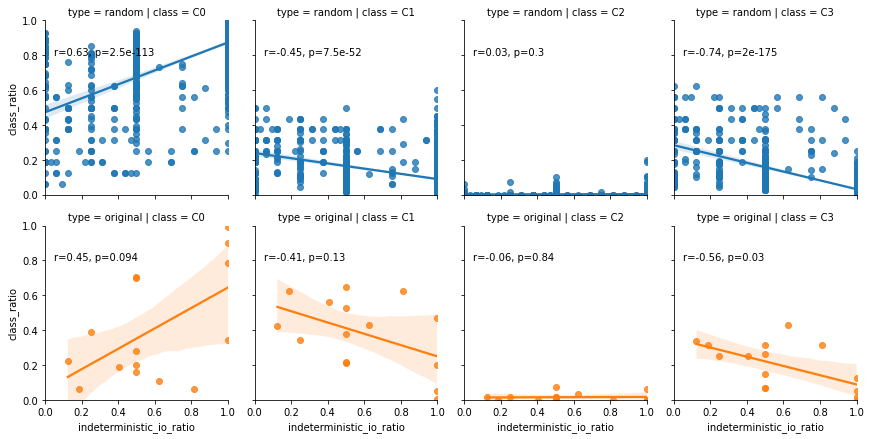

In [37]:
x_val = 'empty_io_ratio'
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', hue='type',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.set_axis_labels('indeterministic_io_ratio', "class_ratio")

g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', row='type', hue='type',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels('indeterministic_io_ratio', "class_ratio")

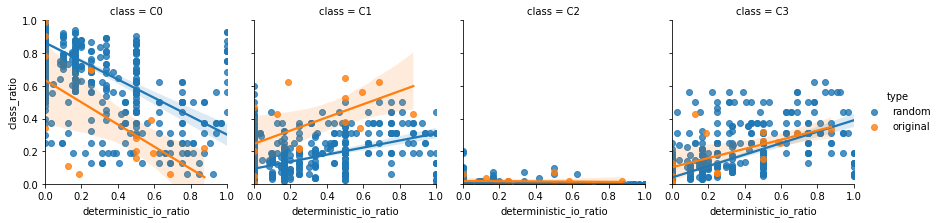

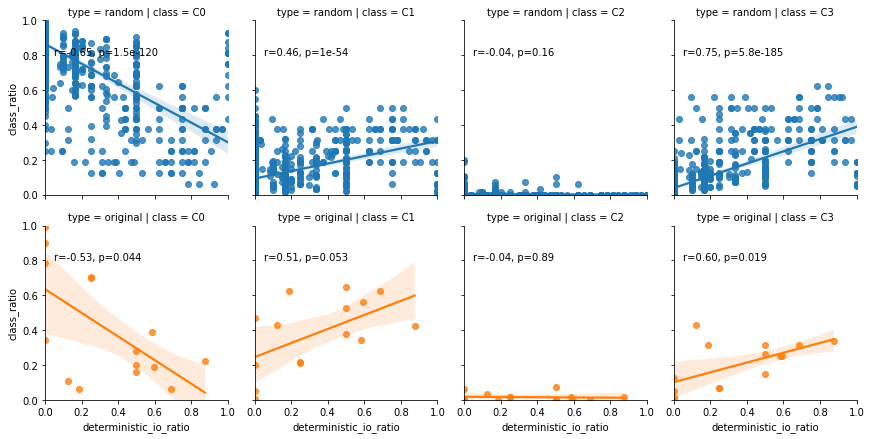

In [38]:
x_val = 'deterministic_io_ratio'
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', hue='type',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.set_axis_labels(x_val, "class_ratio")
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', row='type', hue='type',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

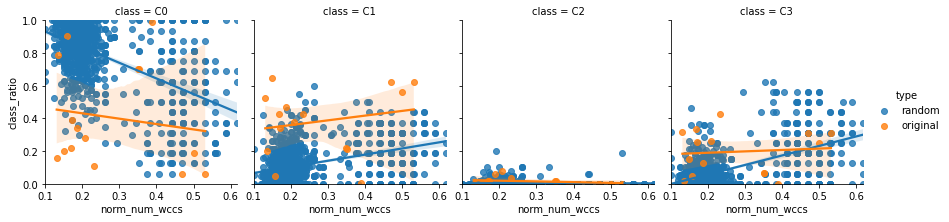

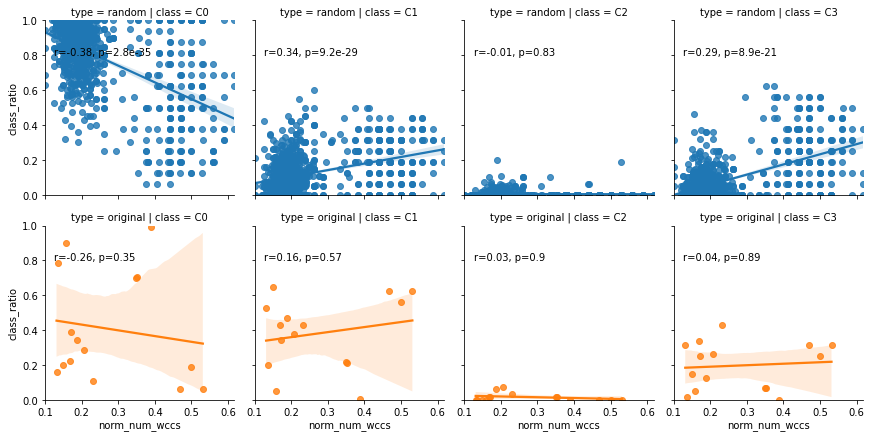

In [39]:
x_val = 'norm_num_wccs'
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', hue='type',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.set_axis_labels(x_val, "class_ratio")
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', row='type', hue='type',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

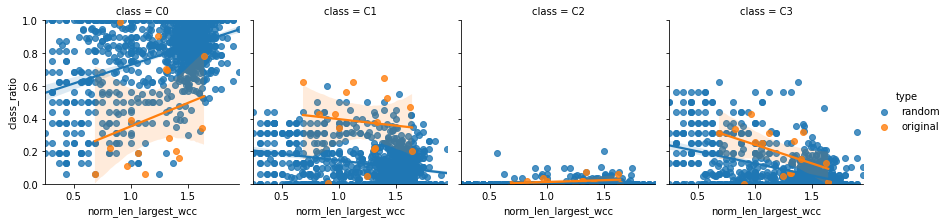

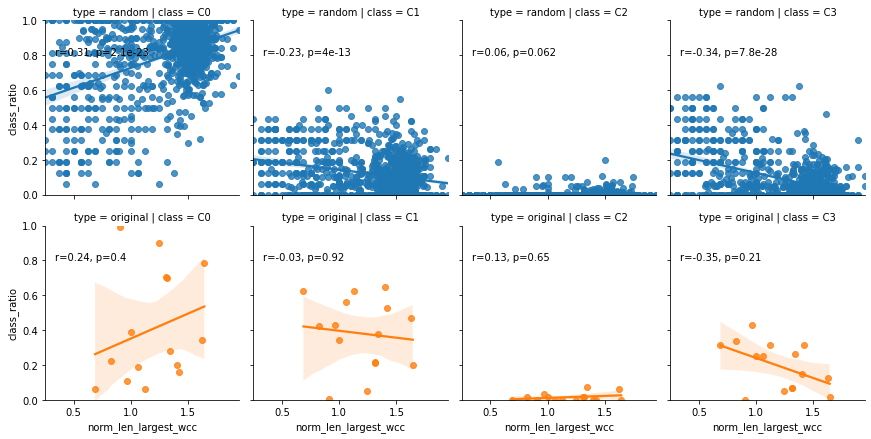

In [40]:
x_val = 'norm_len_largest_wcc'
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', hue='type',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.set_axis_labels(x_val, "class_ratio")
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', row='type', hue='type',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

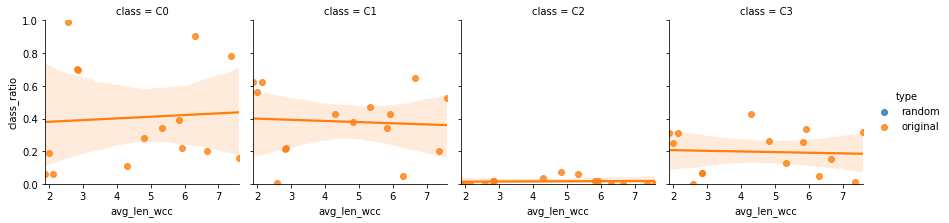

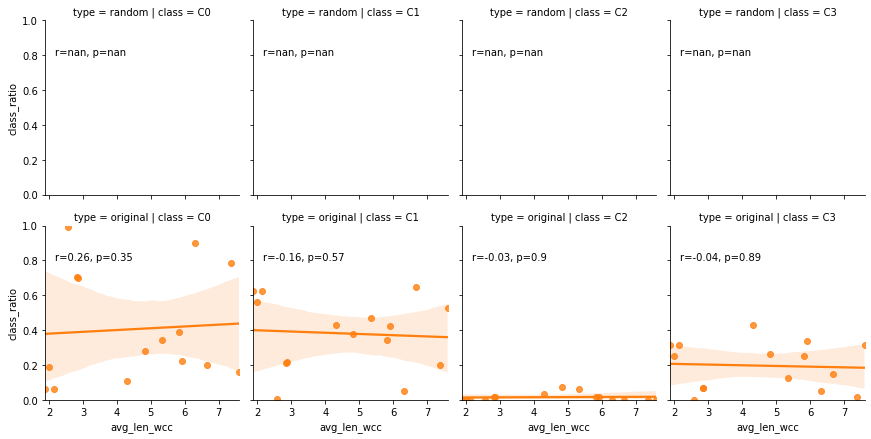

In [45]:
x_val = 'avg_len_wcc'
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', hue='type',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.set_axis_labels(x_val, "class_ratio")
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', row='type', hue='type',
               height=3, aspect=1, logx=False)
def annotate(data, **kws):
    r, p = sp.stats.spearmanr(data[x_val], data['value'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
    
g.set(ylim=(0, 1))
g.map_dataframe(annotate)
g.set_axis_labels(x_val, "class_ratio")

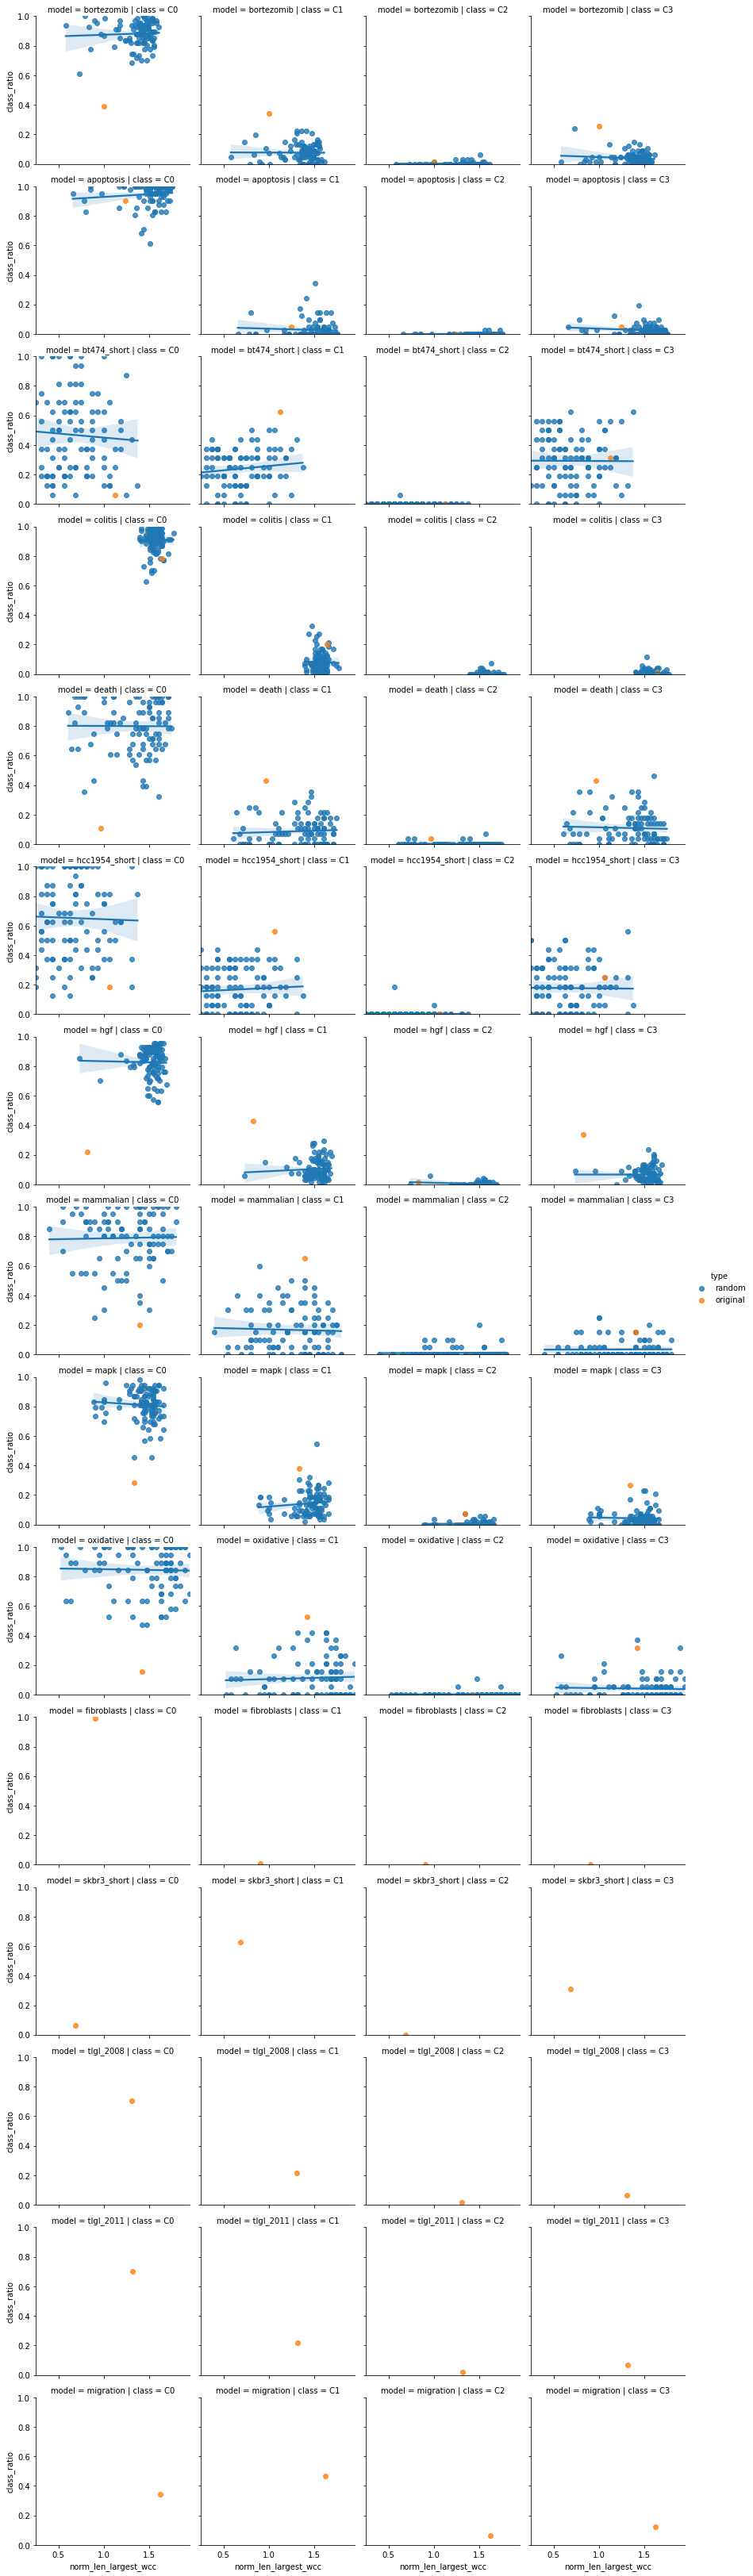

In [41]:
x_val = 'norm_len_largest_wcc'
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', hue='type', row='model',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.set_axis_labels(x_val, "class_ratio")
# g = sns.lmplot(x=x_val, y='value', data=melt_pd[melt_pd['redundancy'] > 0], col='class', row='type', hue='type',
#                height=3, aspect=1, logx=False)
# def annotate(data, **kws):
#     r, p = sp.stats.pearsonr(data[x_val], data['value'])
#     ax = plt.gca()
#     ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
#             transform=ax.transAxes)
    
# g.set(ylim=(0, 1))
# g.map_dataframe(annotate)
# g.set_axis_labels(x_val, "class_ratio")

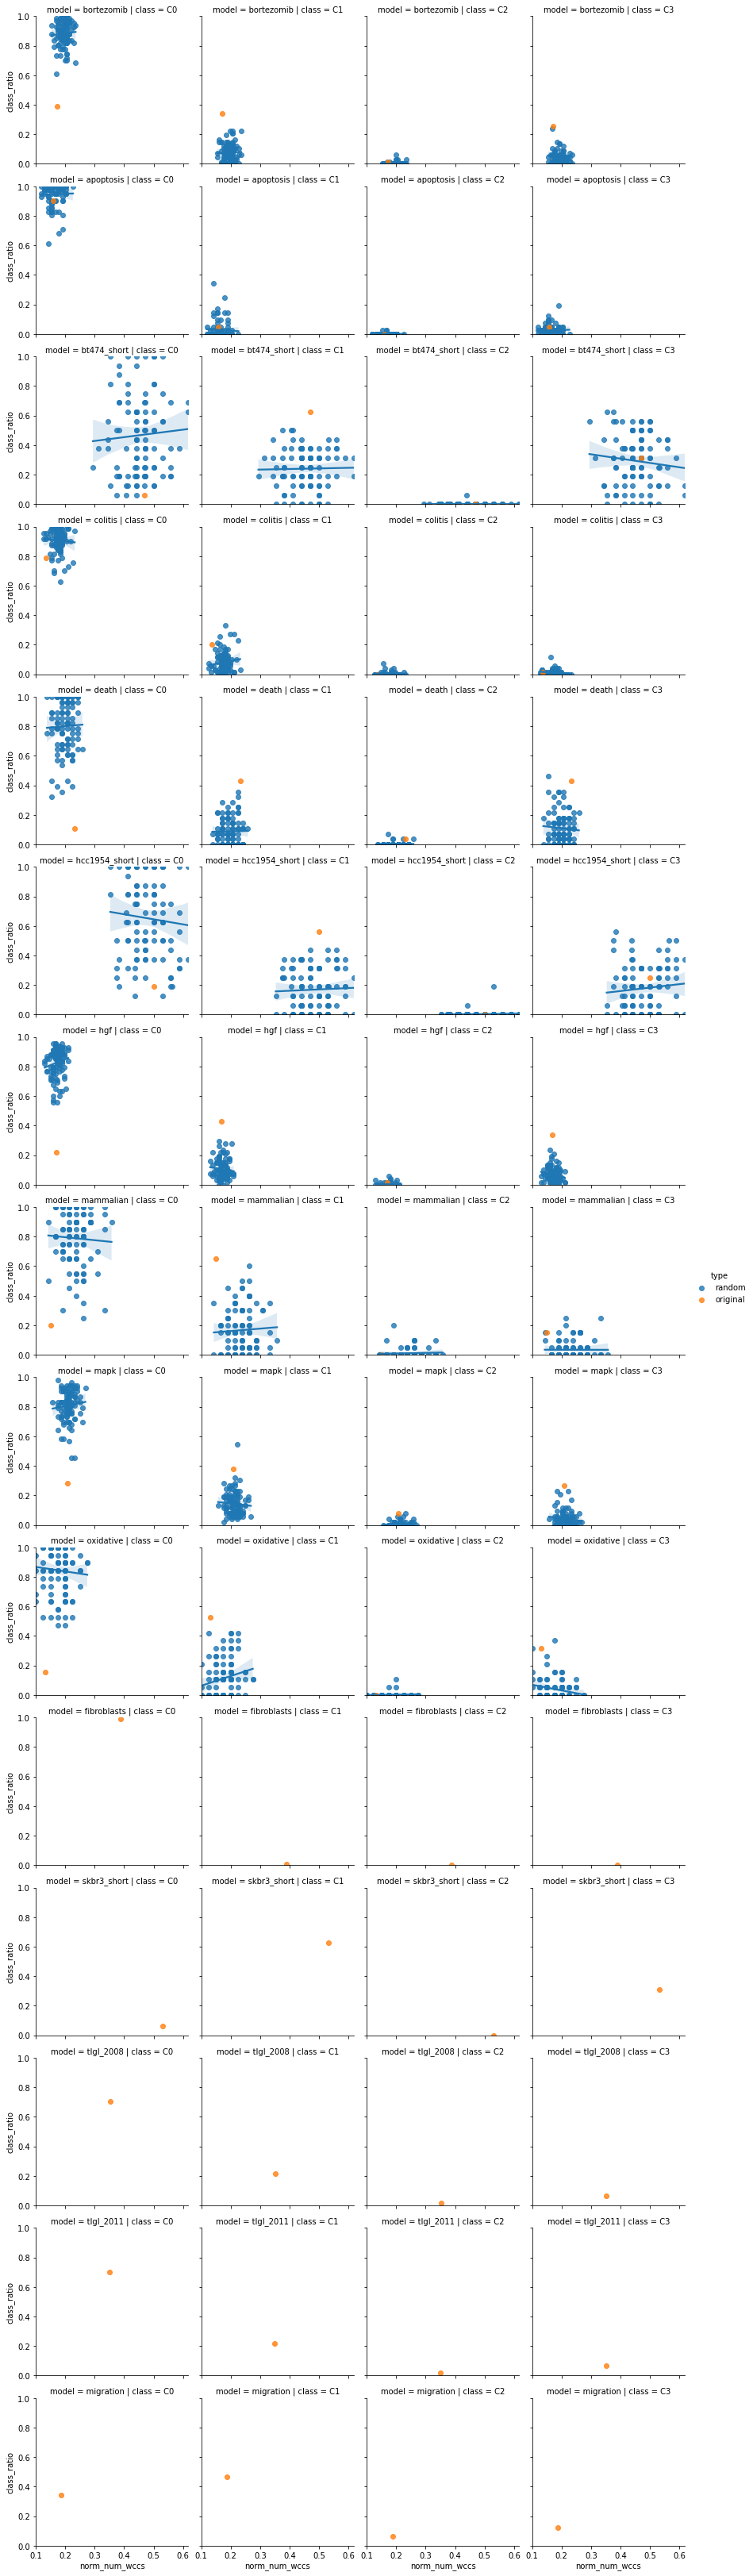

In [42]:
x_val = 'norm_num_wccs'
g = sns.lmplot(x=x_val, y='value', data=melt_pd, col='class', hue='type', row='model',
               height=3, aspect=1, logx=False)
g.set(ylim=(0, 1))
g.set_axis_labels(x_val, "class_ratio")

In [43]:
result_pd.head()

,model,network_idx,size_of_network,num_link,C0,C1,C2,C3,robustness_pa,robustness_ip,...,deterministic_io_ratio,redundancy,num_input,num_output,num_wccs,norm_num_wccs,len_largest_wcc,norm_len_largest_wcc,type,avg_len_wcc
0,bortezomib,61,67,126,56,8,0,3,0.656716,0.892141,...,0.000000,-1.0,5.0,3.0,30,0.220588,97,1.447761,random,NaN
1,bortezomib,27,67,128,65,0,0,2,0.731343,0.925373,...,0.000000,-1.0,5.0,3.0,26,0.191176,102,1.522388,random,NaN
2,bortezomib,60,67,128,55,9,0,3,0.636816,0.876720,...,0.166667,32.0,5.0,3.0,28,0.205882,87,1.298507,random,NaN
3,bortezomib,26,67,127,50,14,1,2,0.738806,0.925373,...,0.000000,-1.0,5.0,3.0,28,0.205882,88,1.313433,random,NaN
4,bortezomib,25,67,128,53,10,0,4,0.675373,0.887608,...,0.000000,-1.0,5.0,3.0,22,0.161765,104,1.552239,random,NaN


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

random v.s. original: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.790e-01 U_stat=1.422e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

random v.s. original: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.084e-04 U_stat=6.050e+02
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

random v.s. original: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.743e-01 U_stat=1.897e+03
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****:

(<AxesSubplot:xlabel='type', ylabel='norm_len_largest_wcc'>,
 [<statannot.StatResult.StatResult at 0x7f16b83a36d0>])

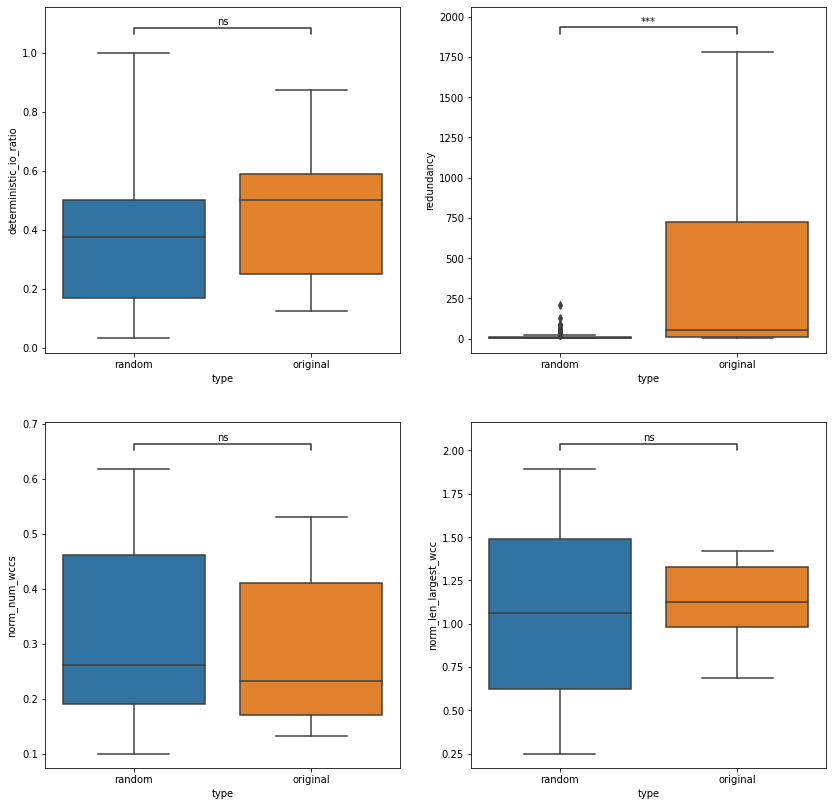

In [44]:
f, axes = plt.subplots(2, 2, figsize=(14, 14))
ax = sns.boxplot(data=result_pd[result_pd['redundancy'] > 0], x='type', y='deterministic_io_ratio', ax=axes[0,0])
add_stat_annotation(ax=ax, data=result_pd[result_pd['redundancy'] > 0], x='type', y='deterministic_io_ratio',
                    box_pairs=[('random', 'original')],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
ax = sns.boxplot(data=result_pd[result_pd['redundancy'] > 0], x='type', y='redundancy', ax=axes[0,1])
add_stat_annotation(ax=ax, data=result_pd[result_pd['redundancy'] > 0], x='type', y='redundancy',
                    box_pairs=[('random', 'original')],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
ax = sns.boxplot(data=result_pd[result_pd['redundancy'] > 0], x='type', y='norm_num_wccs', ax=axes[1,0])
add_stat_annotation(ax=ax, data=result_pd[result_pd['redundancy'] > 0], x='type', y='norm_num_wccs',
                    box_pairs=[('random', 'original')],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)
ax = sns.boxplot(data=result_pd[result_pd['redundancy'] > 0], x='type', y='norm_len_largest_wcc', ax=axes[1,1])
add_stat_annotation(ax=ax, data=result_pd[result_pd['redundancy'] > 0], x='type', y='norm_len_largest_wcc',
                    box_pairs=[('random', 'original')],
                    test='Mann-Whitney', text_format='star', loc='inside', verbose=2)